# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
ames = pd.read_csv('ames.csv',index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [3]:
# Your code here - drop rows with missing data
ames.dropna(axis = 1, inplace=True)

In [4]:
# Listing any columns that have one category representing equal
# to or larger than 95% of all the data to be dropped later
col_to_drop = []
for i in ames.columns:
    max_count = ames[i].value_counts().iloc[0]
    if max_count >= 0.95*len(ames):
        col_to_drop.append(i)

In [5]:
# Columns to drop
col_to_drop

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [6]:
# Dropping the columns
ames.drop(columns=col_to_drop,inplace= True)

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious! The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

0.2638433538714056


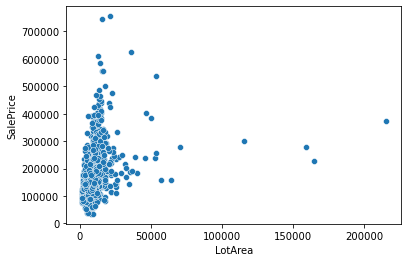

In [7]:
var = 'LotArea'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
# There seems to be a loose linear relationship

0.3864198062421532


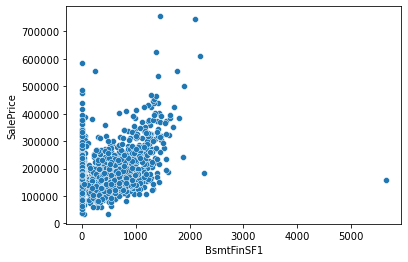

In [8]:
var = 'BsmtFinSF1'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
#

0.21447910554696892


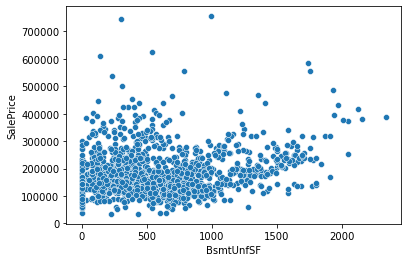

In [9]:
var = 'BsmtUnfSF'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
#

0.6135805515591956


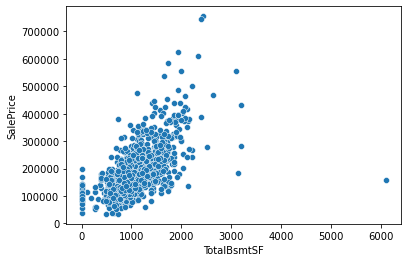

In [10]:
var = 'TotalBsmtSF'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
#

0.6058521846919147


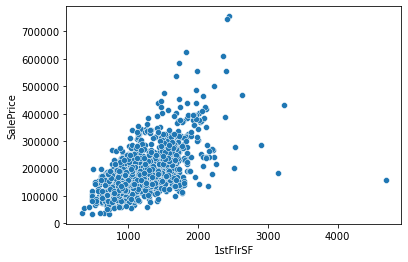

In [11]:
var = '1stFlrSF'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
#

0.3193338028320681


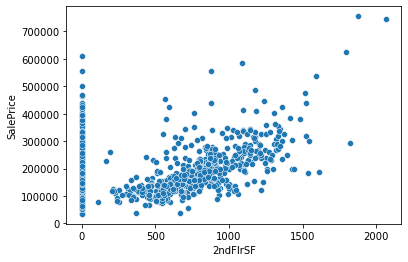

In [12]:
var = '2ndFlrSF'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
# Looks correlated for those with second floors

0.6733048324568378


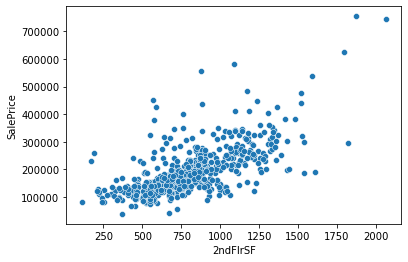

In [13]:
test = ames[['2ndFlrSF','SalePrice']]
test2 = test[test['2ndFlrSF']>0]
print(test2['2ndFlrSF'].corr(test2['SalePrice']))
sns.scatterplot(data=test2, x= '2ndFlrSF', y='SalePrice');
# much more correlated!

0.7086244776126523


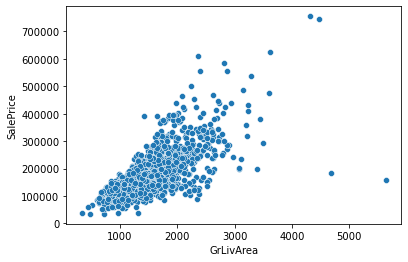

In [14]:
var = 'GrLivArea'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
#

0.6234314389183618


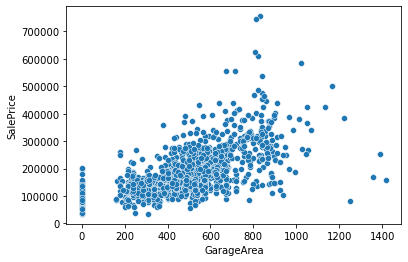

In [15]:
var = 'GarageArea'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
#

0.3244134445681294


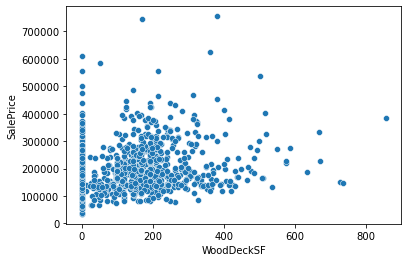

In [16]:
var = 'WoodDeckSF'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
#

0.3158562271160555


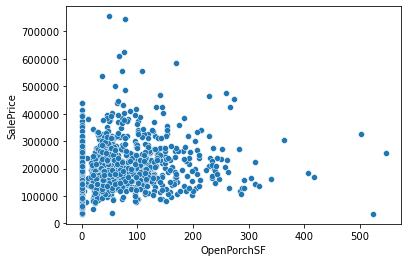

In [17]:
var = 'OpenPorchSF'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
#

### Discrete Numeric Predictor

0.5228973328794969


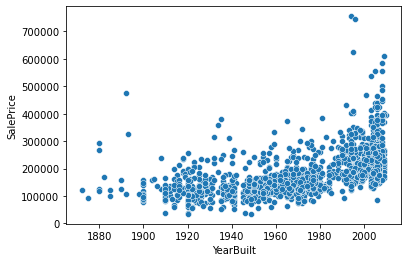

In [18]:
var = 'YearBuilt'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
#

0.5071009671113865


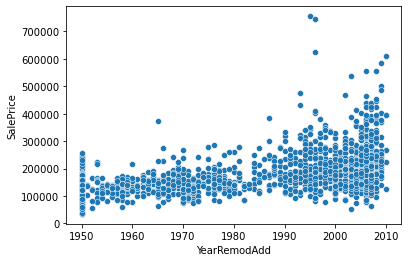

In [19]:
var = 'YearRemodAdd'
print(ames[var].corr(ames['SalePrice']))
sns.scatterplot(data=ames, x= var, y='SalePrice');
#

0.22712223313149382
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


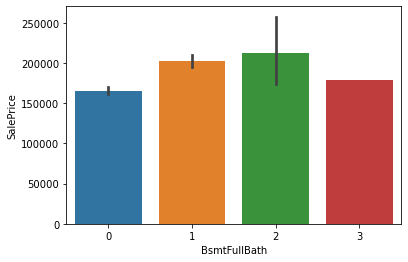

In [20]:
var = 'BsmtFullBath'
print(ames[var].corr(ames['SalePrice']))
print(ames[var].value_counts())
sns.barplot(data=ames, x= var, y='SalePrice');
#

0.5606637627484449
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


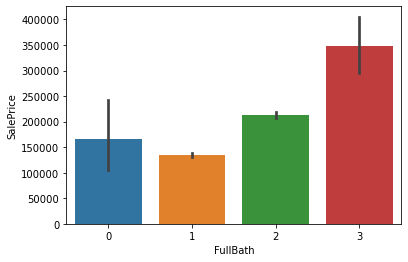

In [21]:
var = 'FullBath'
print(ames[var].corr(ames['SalePrice']))
print(ames[var].value_counts())
sns.barplot(data=ames, x= var, y='SalePrice');
#

0.2841076755947831
0    913
1    535
2     12
Name: HalfBath, dtype: int64


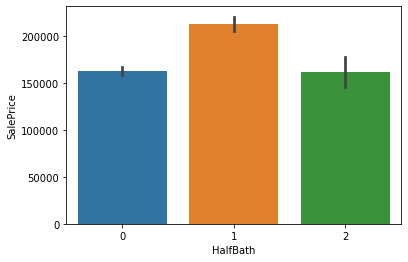

In [22]:
var = 'HalfBath'
print(ames[var].corr(ames['SalePrice']))
print(ames[var].value_counts())
sns.barplot(data=ames, x= var, y='SalePrice');
#

0.16821315430073988
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


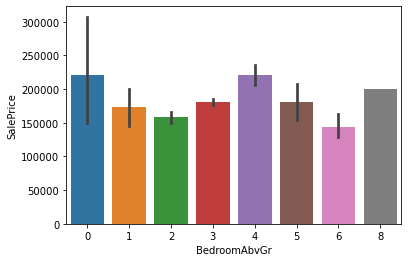

In [23]:
var = 'BedroomAbvGr'
print(ames[var].corr(ames['SalePrice']))
print(ames[var].value_counts())
sns.barplot(data=ames, x= var, y='SalePrice');
#

0.5337231555820282
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


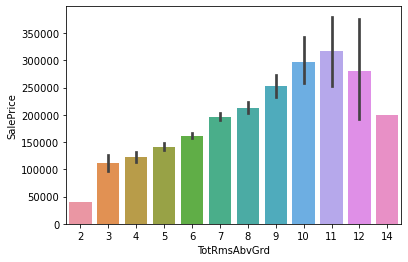

In [24]:
var = 'TotRmsAbvGrd'
print(ames[var].corr(ames['SalePrice']))
print(ames[var].value_counts())
sns.barplot(data=ames, x= var, y='SalePrice');
#

0.46692883675152724
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


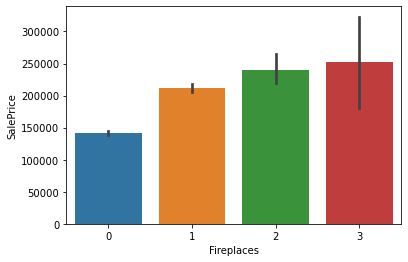

In [25]:
var = 'Fireplaces'
print(ames[var].corr(ames['SalePrice']))
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
#

0.6404091972583529
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


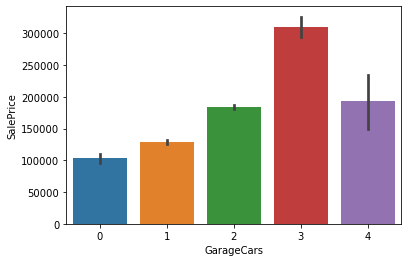

In [26]:
var = 'GarageCars'
print(ames[var].corr(ames['SalePrice']))
print(ames[var].value_counts())
sns.barplot(data=ames, x= var, y='SalePrice');
#

0.046432245223819384
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


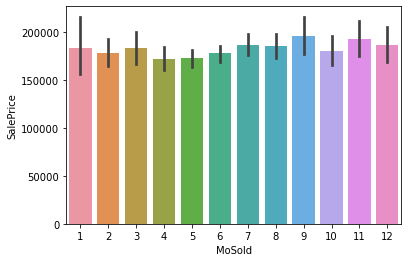

In [27]:
var = 'MoSold'
print(ames[var].corr(ames['SalePrice']))
print(ames[var].value_counts())
sns.barplot(data=ames, x= var, y='SalePrice');
#

-0.028922585168730378
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


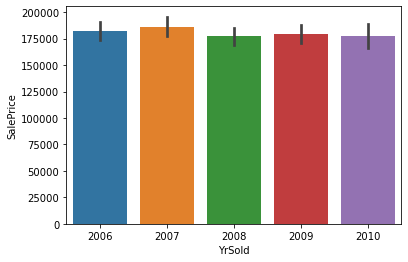

In [28]:
var = 'YrSold'
print(ames[var].corr(ames['SalePrice']))
print(ames[var].value_counts())
sns.barplot(data=ames, x= var, y='SalePrice');
#No relationship here

### String Categorical Predictor

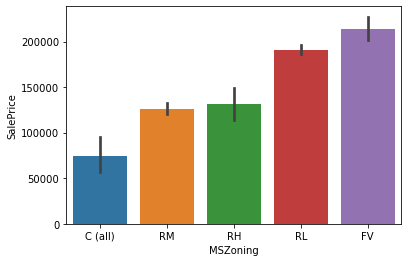

In [29]:
var = 'MSZoning'
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# 

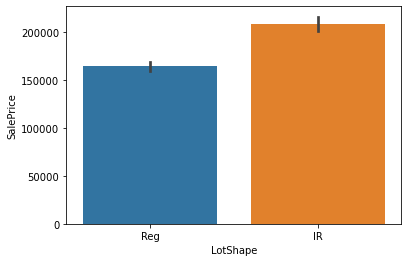

In [30]:
mapper = {'IR1':'IR','IR2':'IR','IR3':'IR','Reg':'Reg'}
ames['LotShape'] = ames['LotShape'].map(mapper)
var = 'LotShape'
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# It looks like Irregular shaped are worth more. Could be correlated
# with other variables though. 

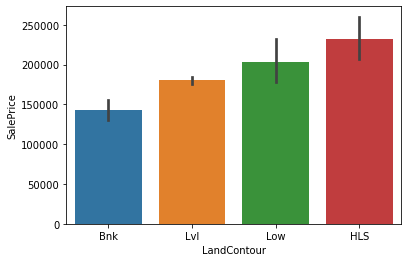

In [31]:
var = 'LandContour'
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# The Hillside seems to be the most expensive, maybe better views?
# Acutally there are 1311 level houses and 149 non level houses, so 
# I'm not convinced this matters all that much. 

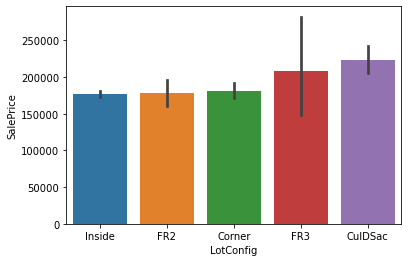

In [32]:
var = 'LotConfig'
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


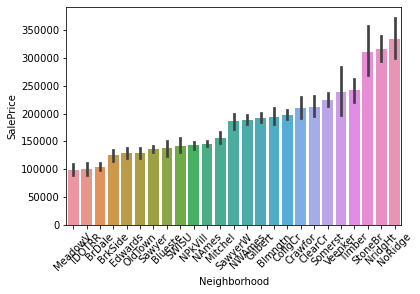

In [33]:
var = 'Neighborhood'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order)
plt.xticks(rotation=45);
# This seems important. so many variables though!

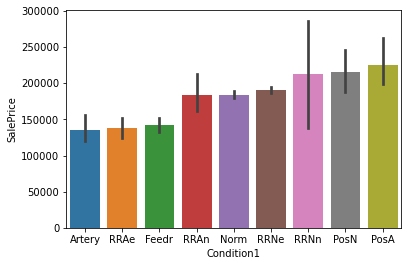

In [34]:
var = 'Condition1'
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# 

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


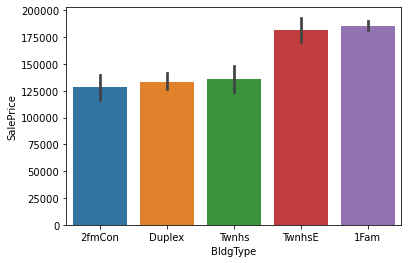

In [35]:
var = 'BldgType'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# 

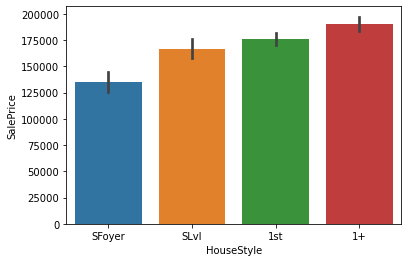

In [36]:
mapper = {'1Story':'1st','2Story':'1+','1.5Fin':'1+','SLvl':'SLvl','SFoyer':'SFoyer',
        '1.5Unf':'1+', '2.5Unf':'1+', '2.5Fin':'1+'}
ames['HouseStyle'] = ames['HouseStyle'].map(mapper)
var = 'HouseStyle'
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# After transforming there doesn't seem to be much of a relationship.

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


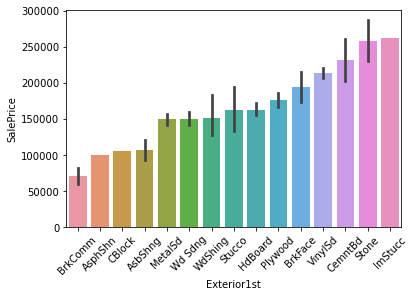

In [37]:
var = 'Exterior1st'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
plt.xticks(rotation=45);
# 

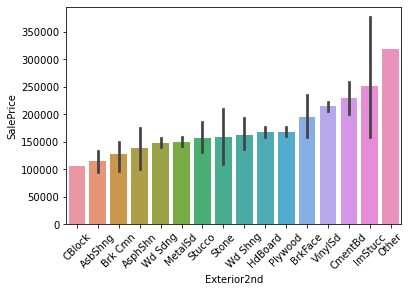

In [38]:
var = 'Exterior2nd'
fig,ax = plt.subplots()
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order)
plt.xticks(rotation=45);
# 

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


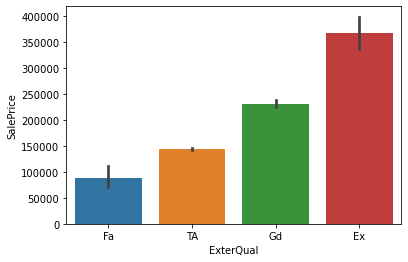

In [39]:
var = 'ExterQual'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# 

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


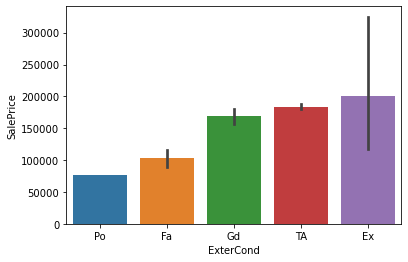

In [40]:
var = 'ExterCond'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# Nog going to use

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


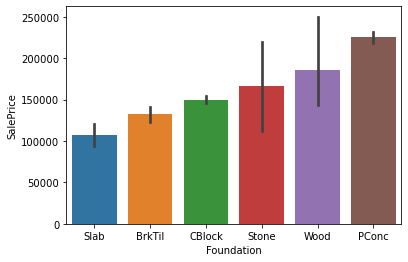

In [41]:
var = 'Foundation'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# Poured concrete is consistently sold more than Cinderblock and 
# Brick & Tile. The others are too small. 

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


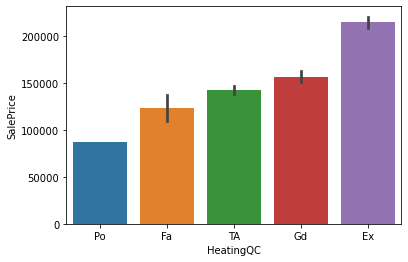

In [42]:
var = 'HeatingQC'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# pretty solid quality

Y    1365
N      95
Name: CentralAir, dtype: int64


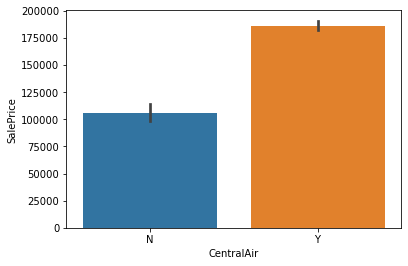

In [43]:
var = 'CentralAir'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# Good correlation and makes sense!

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


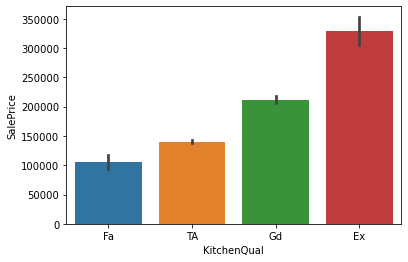

In [44]:
var = 'KitchenQual'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# All of these quality measures are redundant

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


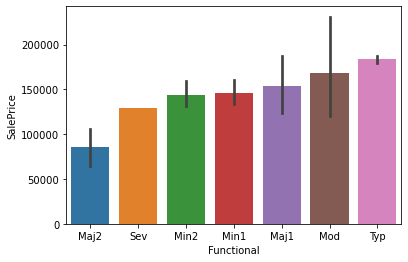

In [45]:
var = 'Functional'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# Not going to use this as most are typical

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


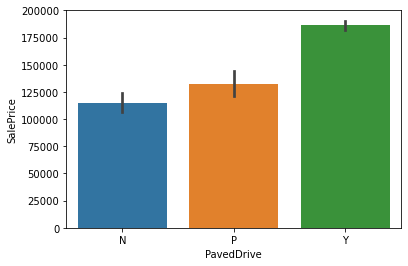

In [46]:
var = 'PavedDrive'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# Definitely better being paved!

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


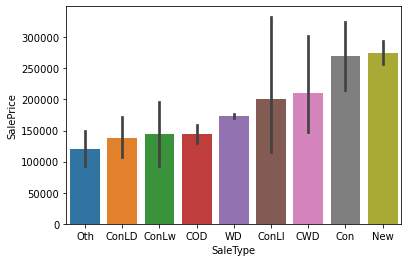

In [47]:
var = 'SaleType'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# The vast majority of are the average anyway. 

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


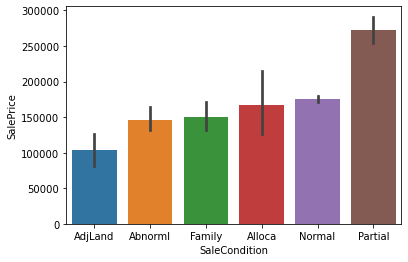

In [48]:
var = 'SaleCondition'
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# Not going to use as partial is already associated with new homes 

In [52]:
var = 'EnclosedPorch'
ames.loc[ames[var]==0,'EnclosedPorch'] = 'No'
ames.loc[ames[var].map(lambda x: isinstance(x, int)),'EnclosedPorch'] = 'Yes'
ames[var].value_counts()
print(ampes[var].corr(ames['SalePrice']))
print(ames[var].value_counts())
order = ames.groupby(var).mean()['SalePrice'].sort_values().index
sns.barplot(data=ames, x= var, y='SalePrice', order= order);
# Lower sales price enclosed porches!

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Discrete Categorical Predictor

-0.12857795792595653


<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

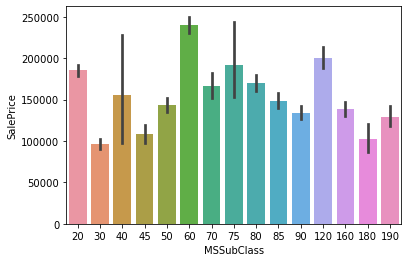

In [50]:
# MSSubClass
print(ames[var].corr(ames['SalePrice']))
sns.barplot(data=ames, x='MSSubClass', y='SalePrice')
# Based on that datafile, I think other variables would overlap with 
# this one. For example '60' means a 2-story newer than 1945.

0.7909816005838044


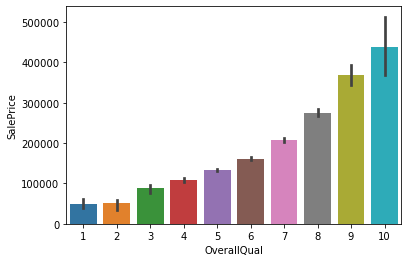

In [51]:
var = 'OverallQual'
print(ames[var].corr(ames['SalePrice']))
sns.barplot(data=ames, x=var, y='SalePrice');
# To no surprise, it does seem that overall quality is strongly 
# correlated with Sale Price.

-0.07785589404867803


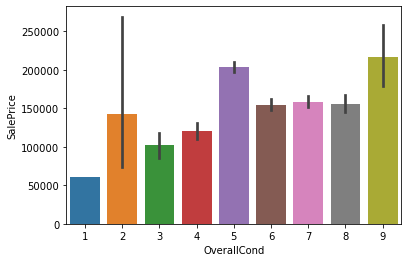

In [53]:
var = 'OverallCond'
print(ames[var].corr(ames['SalePrice']))

sns.barplot(data=ames, x=var, y='SalePrice');
# Overall Condition doesn't seem corrolated as much.

In [54]:
num = ['LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','YearBuilt','YearRemodAdd','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']
num_list= []
for i in num:
    cor = ames[i].corr(ames['SalePrice'])
    num_list.append([i,cor])
num_df = pd.DataFrame(num_list, columns=['cat','cor'])
num_df.sort_values('cor', ascending=False)

,cat,cor
6,GrLivArea,0.708624
18,GarageCars,0.640409
7,GarageArea,0.623431
3,TotalBsmtSF,0.613581
4,1stFlrSF,0.605852
13,FullBath,0.560664
16,TotRmsAbvGrd,0.533723
10,YearBuilt,0.522897
11,YearRemodAdd,0.507101
17,Fireplaces,0.466929


## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first!

In [55]:
cat_list = []
for i in ames.select_dtypes("object").columns:
    df = pd.get_dummies(ames[i], drop_first= True)
    model = sm.OLS(ames['SalePrice'], sm.add_constant(df)).fit()
    r2 = model.rsquared
    r2a = model.rsquared_adj
    cat_list.append([i,r2,r2a])
cat_df = pd.DataFrame(cat_list, columns= ['cat', 'rsquared','r2_adjusted'])
cat_df.sort_values('r2_adjusted',ascending=False)
#Neighborhood seems to have the highest rsquared value, 
# so maybe lets go with that?

,cat,rsquared,r2_adjusted
5,Neighborhood,0.545575,0.537975
12,ExterQual,0.477388,0.476311
17,KitchenQual,0.456599,0.455479
14,Foundation,0.256368,0.253811
15,HeatingQC,0.195500,0.193289
11,Exterior2nd,0.153830,0.145040
10,Exterior1st,0.152773,0.144565
21,SaleType,0.137287,0.132531
22,SaleCondition,0.135497,0.132525
0,MSZoning,0.107560,0.105106


In [89]:
# Selecting our categories then standardizing them
df_n = pd.get_dummies(ames['Neighborhood'], drop_first=True)
df_gla_std = (ames['GrLivArea'] - ames['GrLivArea'].mean()) / ames['GrLivArea'].std()
df_qual_std = (ames['OverallQual'] -
               ames['OverallQual'].mean()) / ames['OverallQual'].std()

In [90]:
# Your code here - prepare X and y, including one-hot encoding
X = pd.concat([df_gla_std,df_qual_std,df_n],axis=1)
y = ames['SalePrice']

In [ ]:
# Your answer here - which category or categories were dropped?
# The Neighborhood of Blmngtn was dropped.

In [91]:
# Your code here - build a regression model and display results
model = sm.OLS(endog= y, exog= sm.add_constant(X)).fit()
results = model.summary()
results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     203.5
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        06:45:19   Log-Likelihood:                -17416.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1433   BIC:                         3.503e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.772e+05   9080.456     19.511      0.000    1.59e+05    1.95e+05
GrLivArea     2.92e+04   1313.064     22.237      0.000    2.66e+04    3.18e+04
OverallQual  2.898e+04   1607.421     18.026      0.000    2.58e+04    3.21e+04
Blueste     -3.075e+04   2.77e+04     -1.110      0.267   -8.51e+04    2.36e+04
BrDale      -4.336e+04    1.3e+04     -3.341      0.001   -6.88e+04   -1.79e+04
BrkSide     -1.303e+04   1.05e+04     -1.246      0.213   -3.35e+04    7474.357
ClearCr      2.458e+04   1.16e+04      2.124      0.034    1880.417    4.73e+04
CollgCr      1.141e+04   9496.582      1.202      0.230   -7214.383       3e+04
Crawfor      1.444e+04   1.05e+04      1.375      0.169   -6157.113     3.5e+04
Edwards     -1.784e+04   9985.734     -1.787      0.074   -3.74e+04    1745.272
Gilbert      -892.8796   9954.350     -0.090      0.929   -2.04e+04    1.86e+04
IDOTRR      -2.818e+04   1.11e+04     -2.531      0.011      -5e+04   -6335.193
MeadowV      -1.91e+04    1.3e+04     -1.469      0.142   -4.46e+04    6400.778
Mitchel      2030.6121   1.06e+04      0.192      0.847   -1.87e+04    2.27e+04
NAmes       -4430.0994   9517.291     -0.465      0.642   -2.31e+04    1.42e+04
NPkVill     -1.781e+04   1.53e+04     -1.164      0.245   -4.78e+04    1.22e+04
NWAmes      -4720.6584   1.01e+04     -0.468      0.640   -2.45e+04    1.51e+04
NoRidge      6.464e+04   1.09e+04      5.909      0.000    4.32e+04    8.61e+04
NridgHt      7.159e+04   9994.775      7.163      0.000     5.2e+04    9.12e+04
OldTown     -3.208e+04   9863.373     -3.253      0.001   -5.14e+04   -1.27e+04
SWISU       -3.664e+04   1.19e+04     -3.073      0.002      -6e+04   -1.33e+04
Sawyer      -1219.3805   1.02e+04     -0.119      0.905   -2.13e+04    1.88e+04
SawyerW       303.0986   1.03e+04      0.030      0.976   -1.98e+04    2.04e+04
Somerst      1.777e+04   9829.881      1.807      0.071   -1515.536     3.7e+04
StoneBr      6.995e+04   1.17e+04      5.984      0.000     4.7e+04    9.29e+04
Timber       2.991e+04   1.08e+04      2.762      0.006    8662.963    5.11e+04
Veenker      4.711e+04   1.43e+04      3.285      0.001     1.9e+04    7.52e+04
==============================================================================
Omnibus:                      408.442   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9010.006
Skew:                           0.760   Prob(JB):                         0.00
Kurtosis:                      15.075   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
res = pd.concat([model.params,model.pvalues], axis=1)
res.loc[res[1]<0.05].sort_values(0)

,0,1
BrDale,-43358.881195,8.568095e-04
SWISU,-36640.151727,2.159781e-03
OldTown,-32080.877469,1.170466e-03
IDOTRR,-28178.986570,1.149517e-02
ClearCr,24575.635062,3.382834e-02
OverallQual,28975.748302,1.238994e-65
GrLivArea,29198.054813,2.375376e-94
Timber,29905.811410,5.825641e-03
Veenker,47106.892937,1.042655e-03
NoRidge,64642.989468,4.294924e-09


## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

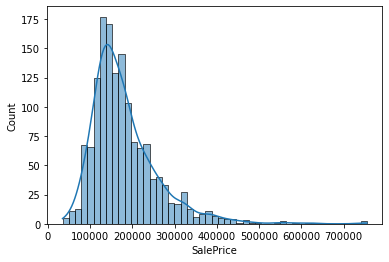

In [73]:
sns.histplot(data=ames, x= 'SalePrice', kde= True)

In [76]:
# Although the histogram looks mostly normal, I wanted to check 
# here anyway
from scipy.stats import stats
y2 = (ames['SalePrice']-ames['SalePrice'].mean())/ames['SalePrice'].std()
print(stats.kstest(y2,'norm'))

KstestResult(statistic=0.12368542719946385, pvalue=6.330230702928437e-20)


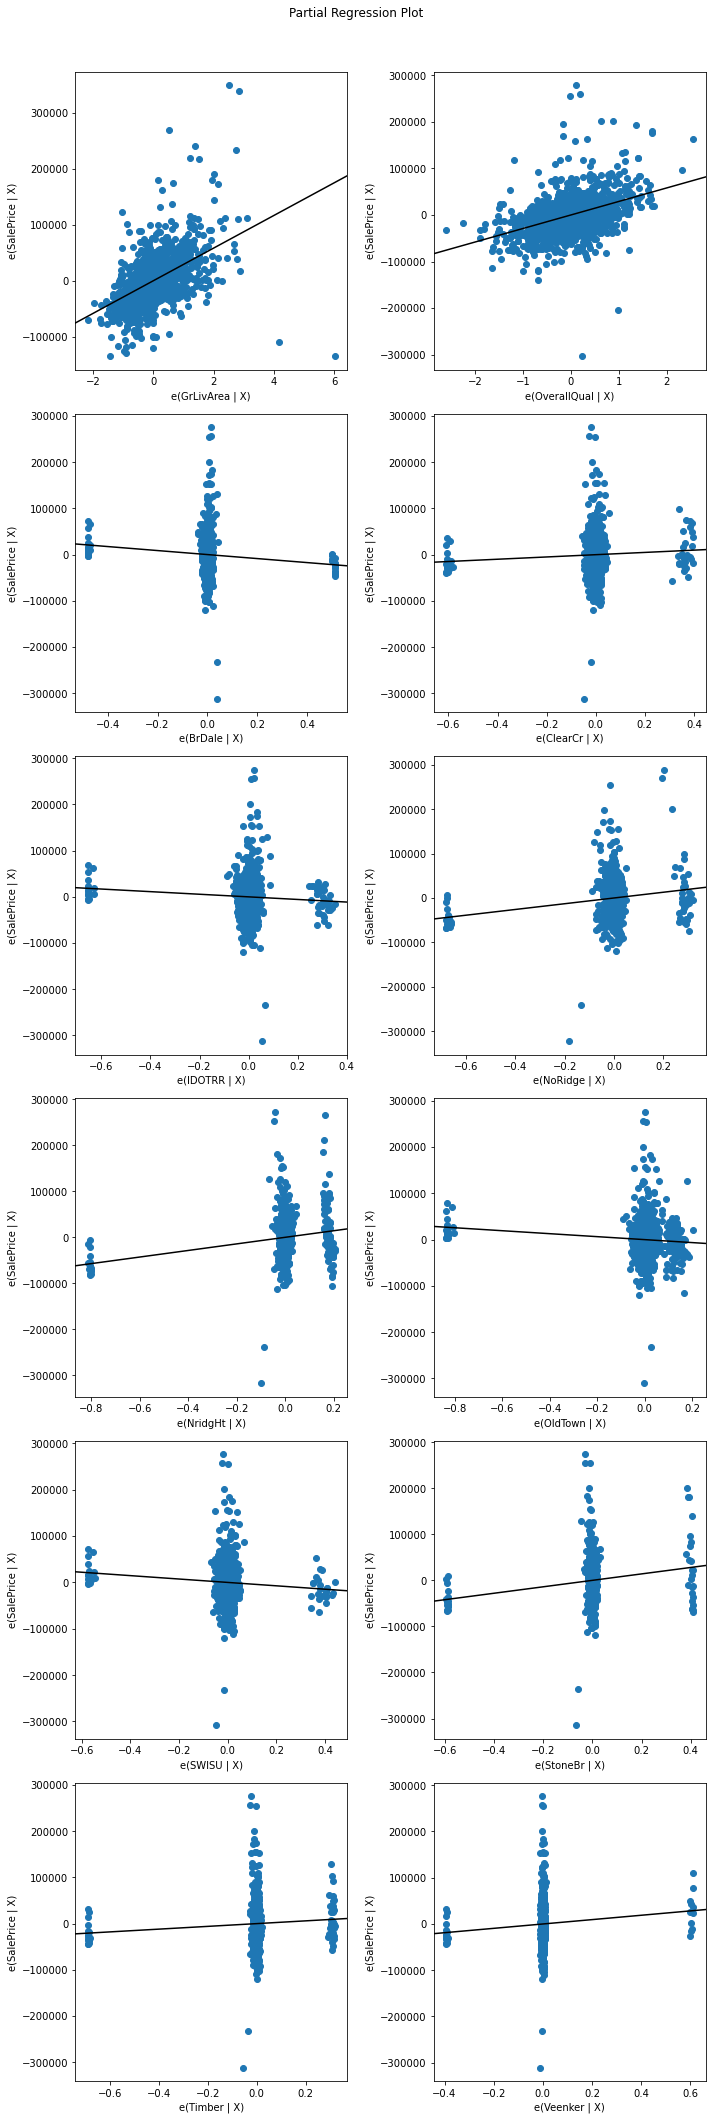

In [92]:
# Your code here - create partial regression plots
# only selecting columns with significant p-values
col_list = ['GrLivArea','OverallQual','BrDale','ClearCr','IDOTRR','NoRidge','NridgHt','OldTown','SWISU','StoneBr','Timber','Veenker']
fig = plt.figure(figsize= (10,30))
sm.graphics.plot_partregress_grid(model, exog_idx=col_list, grid=(6,2), fig=fig)
# plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [83]:
# Your code here - calculate an error-based metric
mae = model.resid.abs().sum() / len(y)
mae

24223.137098357744

In [86]:
ames['GrLivArea'].std()

525.4803834232025

In [88]:
ames['OverallQual'].std()

1.3829965467415934

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [ ]:
ames['SalePrice'].mean()

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 78.7% of the variance in Sale Price. 
* `GrLivArea`,`OverallQual` and some of the Neighborhoods are statistically significant. For those that are not, it is likely that their coefficients are zero.
* An increase of 525 square feet corresponds to an increase in `SalePrice` of \\$29,200. An increase of 1.4 in `OverallQual` corresponds to an increase in `SalePrice` of about the same, 28,980.
* Among the Neighborhoods with significant p-values, houses in 'NridgHt' and 'BrDale' were the neighborhoods with the greatest increase and decrease in `SalePrice` at \\$71,587 and \\$-43,358 respectively.


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [ ]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.